In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Creating dataframe of the data

df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [4]:
df.shape

(397, 6)

In [5]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [6]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

##### Encoding categorical inputs

In [5]:
enc = OrdinalEncoder()
list1 = ['rank', 'discipline', 'sex']
for i in list1:
    df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [6]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [9]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [7]:
df.loc[df['salary'] == " "]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [18]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


In [11]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [12]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

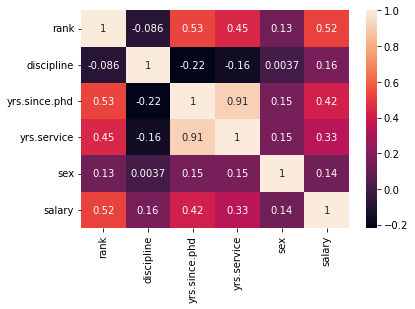

In [13]:
sns.heatmap(df.corr(), annot=True)

### Univariate Analysis

rank                AxesSubplot(0.125,0.536818;0.133621x0.343182)
discipline       AxesSubplot(0.285345,0.536818;0.133621x0.343182)
yrs.since.phd     AxesSubplot(0.44569,0.536818;0.133621x0.343182)
yrs.service      AxesSubplot(0.606034,0.536818;0.133621x0.343182)
sex              AxesSubplot(0.766379,0.536818;0.133621x0.343182)
salary                 AxesSubplot(0.125,0.125;0.133621x0.343182)
dtype: object

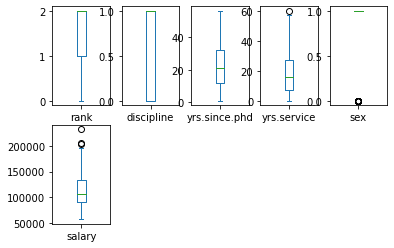

In [14]:
df.plot(kind='box', subplots=True, layout=(2, 5))

<AxesSubplot:xlabel='sex', ylabel='count'>

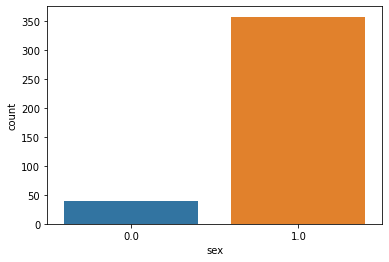

In [15]:
sns.countplot(df.sex)

<AxesSubplot:>

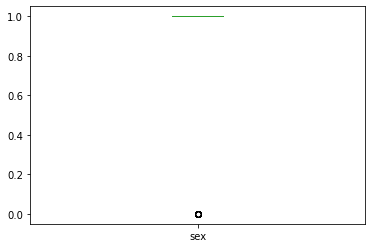

In [16]:
df.sex.plot.box()

<Figure size 432x288 with 0 Axes>

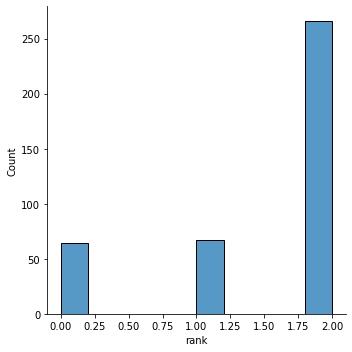

<Figure size 432x288 with 0 Axes>

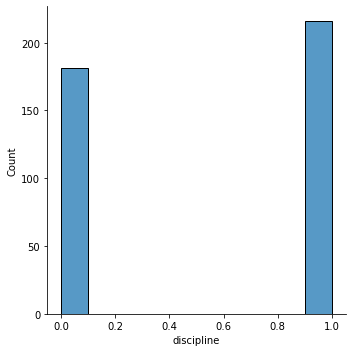

<Figure size 432x288 with 0 Axes>

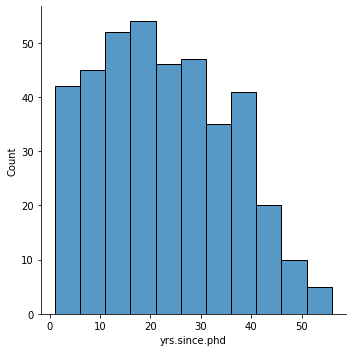

<Figure size 432x288 with 0 Axes>

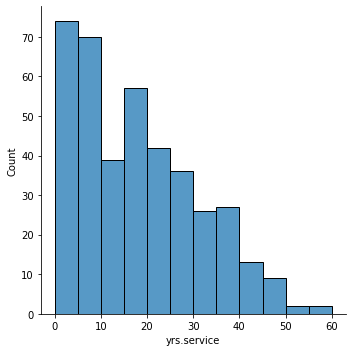

<Figure size 432x288 with 0 Axes>

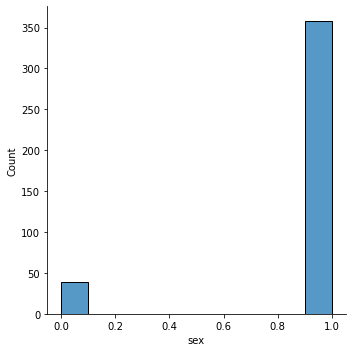

<Figure size 432x288 with 0 Axes>

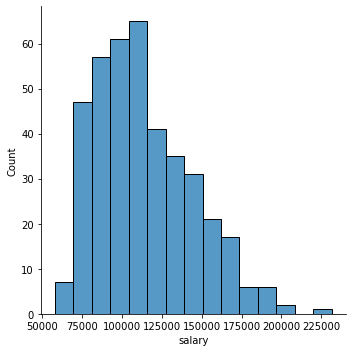

In [17]:
for i in df.columns:
    plt.figure()
    sns.displot(df[i])

### Bivariate Analysis

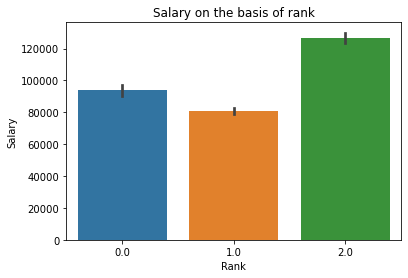

In [18]:
# rank and salary

sns.barplot(x=df['rank'], y=df['salary'])
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.title('Salary on the basis of rank')
plt.show()

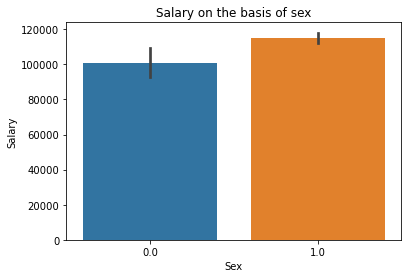

In [19]:
# sex and salary

sns.barplot(x=df['sex'], y=df['salary'])
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.title('Salary on the basis of sex')
plt.show()

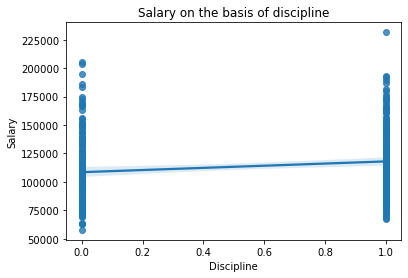

In [20]:
# salary and discipline

sns.regplot(df.discipline,df.salary,df)
plt.xlabel('Discipline')
plt.ylabel('Salary')
plt.title('Salary on the basis of discipline')
plt.show()

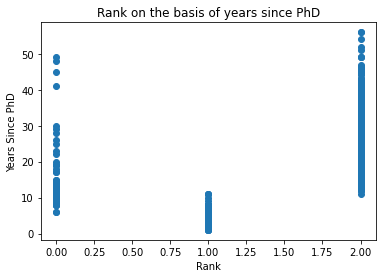

In [21]:
# rank and years since phd


plt.scatter(df['rank'],df['yrs.since.phd'])
plt.xlabel('Rank')
plt.ylabel('Years Since PhD')
plt.title('Rank on the basis of years since PhD')
plt.show()

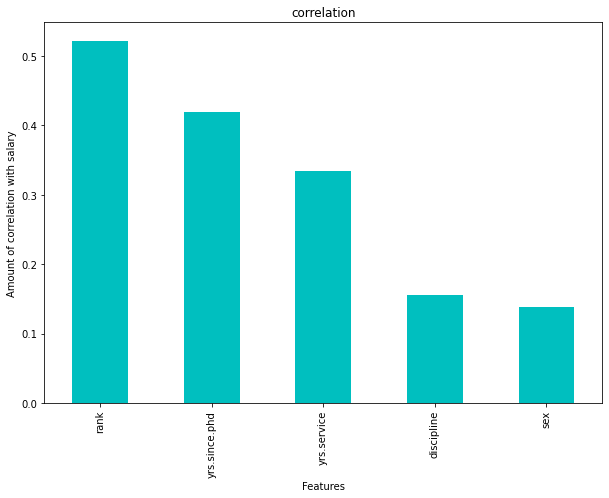

In [10]:
plt.figure(figsize=(10,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Features')
plt.ylabel('Amount of correlation with salary')
plt.title('correlation')
plt.show()

### outliers

rank                AxesSubplot(0.125,0.536818;0.168478x0.343182)
discipline       AxesSubplot(0.327174,0.536818;0.168478x0.343182)
yrs.since.phd    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
yrs.service      AxesSubplot(0.731522,0.536818;0.168478x0.343182)
sex                    AxesSubplot(0.125,0.125;0.168478x0.343182)
salary              AxesSubplot(0.327174,0.125;0.168478x0.343182)
dtype: object

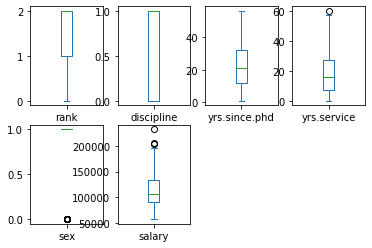

In [15]:
df.plot(kind='box', subplots=True, layout=(2, 4))

In [16]:
from scipy.stats import zscore

z = np.abs(zscore(df))

print(len(np.where(z > 3)))

2


In [17]:
z = np.abs(zscore(df['sex']))

print(len(np.where(z > 3)))

1


As the data is categorical and the there are very few outliers, we will leave it as is.

### Skewness

In [19]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

There is skewness in sex and rank which are both categorical data. To avoid bias in our model, we will not remove this skewness.

### Testing and Training the model

##### Splitting data into features and target

In [25]:
x = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [26]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [27]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

###### Linear Regression

In [28]:
lr = LinearRegression()
from sklearn.metrics import r2_score

In [30]:
best_train_score  = 0
best_test_score  = 0
best_random_state_test = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3, random_state=i)
    lr.fit(xtrain,ytrain)
    pred_train = lr.predict(xtrain)
    pred_test = lr.predict(xtest)
    print(f"At random state {i}, the training accuracy is: {r2_score(ytrain, pred_train)}")
    print(f"At random state {i}, the testing accuracy is: {r2_score(ytest, pred_test)}")
    print('\n')
    if r2_score(ytrain, pred_train) > best_train_score:
        best_train_score = r2_score(ytrain, pred_train)
    if r2_score(ytest, pred_test) > best_test_score:
        best_test_score = r2_score(ytest, pred_test)
        best_random_state_test = i
        
print(best_train_score)
print(best_test_score)
print(best_random_state_test)

At random state 0, the training accuracy is: 0.35238978918304
At random state 0, the testing accuracy is: 0.3944705006995439


At random state 1, the training accuracy is: 0.37981683378332454
At random state 1, the testing accuracy is: 0.3175095677056925


At random state 2, the training accuracy is: 0.41023070933432815
At random state 2, the testing accuracy is: 0.232111211405579


At random state 3, the training accuracy is: 0.3849700365272737
At random state 3, the testing accuracy is: 0.33785299194050067


At random state 4, the training accuracy is: 0.38484712069927296
At random state 4, the testing accuracy is: 0.30745500516689084


At random state 5, the training accuracy is: 0.4197135328568442
At random state 5, the testing accuracy is: 0.21891674562236862


At random state 6, the training accuracy is: 0.3770581841035513
At random state 6, the testing accuracy is: 0.3513506580306237


At random state 7, the training accuracy is: 0.3526070609258284
At random state 7, the testing

At random state 76, the training accuracy is: 0.39619691936532064
At random state 76, the testing accuracy is: 0.26978294895376076


At random state 77, the training accuracy is: 0.3849378488209082
At random state 77, the testing accuracy is: 0.3033804271587591


At random state 78, the training accuracy is: 0.3809094001399288
At random state 78, the testing accuracy is: 0.33766300533281823


At random state 79, the training accuracy is: 0.34838108023623193
At random state 79, the testing accuracy is: 0.415469339763908


At random state 80, the training accuracy is: 0.3481987236486287
At random state 80, the testing accuracy is: 0.4450787110648239


At random state 81, the training accuracy is: 0.3472333600608519
At random state 81, the testing accuracy is: 0.42279186237072386


At random state 82, the training accuracy is: 0.38597750796388186
At random state 82, the testing accuracy is: 0.31263128406241314


At random state 83, the training accuracy is: 0.3844153336701147
At random st

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.3, random_state=88)

In [37]:
lr.fit(xtrain,ytrain)
pred_train = lr.predict(xtrain)
pred_test = lr.predict(xtest)
r2_score(ytest,pred_test)

0.45906849618811196

### cross validation of model

In [39]:
train_accuracy = r2_score(ytrain, pred_train)
test_accuracy = r2_score(ytest, pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score = cross_val_score(lr, x, y, cv=j)
    cv_mean = cv_score.mean()
    print(f'At cross fold {j} the cv score is {cv_mean} and accuracy for training is {train_accuracy}, and accuracy for testing is {test_accuracy}')
    print('\n')

At cross fold 2 the cv score is 0.3270801167406513 and accuracy for training is 0.3352156293348948, and accuracy for testing is 0.45906849618811196


At cross fold 3 the cv score is 0.32033286730598803 and accuracy for training is 0.3352156293348948, and accuracy for testing is 0.45906849618811196


At cross fold 4 the cv score is 0.321819669376836 and accuracy for training is 0.3352156293348948, and accuracy for testing is 0.45906849618811196


At cross fold 5 the cv score is 0.29569928663871775 and accuracy for training is 0.3352156293348948, and accuracy for testing is 0.45906849618811196


At cross fold 6 the cv score is 0.33096341839295546 and accuracy for training is 0.3352156293348948, and accuracy for testing is 0.45906849618811196


At cross fold 7 the cv score is 0.3257704419996536 and accuracy for training is 0.3352156293348948, and accuracy for testing is 0.45906849618811196


At cross fold 8 the cv score is 0.3310060584513582 and accuracy for training is 0.3352156293348948

cv = 8 chosen

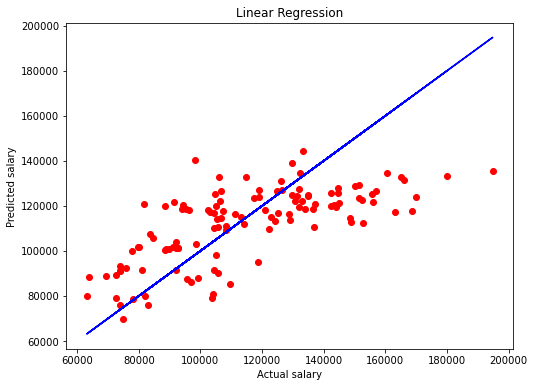

In [40]:
plt.figure(figsize = (8,6))
plt.scatter(x=ytest, y=pred_test, color='r')
plt.plot(ytest, ytest, color='b')
plt.xlabel('Actual salary')
plt.ylabel('Predicted salary')
plt.title('Linear Regression')
plt.show()

We can see that the best fit line misses most points, which means there is high bias in the model

### Regularization

###### Lasso

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet

parameters = {'alpha':[1,0.1,0.01,0.001,0.0001,0, 10, 100, 1000, 10000, 0.00001], 'random_state':list(range(0,100))}
model = Lasso()

grid = GridSearchCV(estimator=model, param_grid=parameters)

grid.fit(xtrain, ytrain)

print(grid)

print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0, 10, 100,
                                   1000, 10000, 1e-05],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})
0.19114804673057828
{'alpha': 100, 'random_state': 0}


In [60]:
ls = Lasso(alpha=100, random_state=0)

ls.fit(xtrain,ytrain)
print(ls.score(xtrain,ytrain))
predlasso = ls.predict(xtest)
r2_score(ytest, predlasso)

0.33503832159256786


0.46106553122180793

###### Ridge

In [43]:
parameters = {'alpha':[1,0.1,0.01,0.001,0.0001,0, 10, 100, 1000, 10000, 0.00001], 'random_state':list(range(0,100))}
model = Ridge()

grid = GridSearchCV(estimator=model, param_grid=parameters)

grid.fit(xtrain, ytrain)

print(grid)

print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0, 10, 100,
                                   1000, 10000, 1e-05],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})
0.19710092894309425
{'alpha': 10, 'random_state': 0}


In [45]:
rd = Ridge(alpha=10, random_state=0)

rd.fit(xtrain,ytrain)
print(rd.score(xtrain,ytrain))
predridge = rd.predict(xtest)
r2_score(ytest, predridge)

0.33319337780322356


0.4594670170695534

###### Elastic Net

In [46]:
parameters = {'alpha':[1,0.1,0.01,0.001,0.0001,0, 10, 100, 1000, 10000, 0.00001], 'random_state':list(range(0,100))}
model = ElasticNet()

grid = GridSearchCV(estimator=model, param_grid=parameters)

grid.fit(xtrain, ytrain)

print(grid)

print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0, 10, 100,
                                   1000, 10000, 1e-05],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                          12, 13, 14, 15, 16, 17, 18, 19, 20,
                                          21, 22, 23, 24, 25, 26, 27, 28, 29, ...]})
0.19738717934848926
{'alpha': 0.1, 'random_state': 0}


In [47]:
el = ElasticNet(alpha=0.1, random_state=0)
el.fit(xtrain,ytrain)
print(el.score(xtrain,ytrain))
predel = el.predict(xtest)
r2_score(ytest, predel)

0.33175057653278195


0.4581327162629374

### Ensemble Technique

In [48]:
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion': ['mse', 'mae'],'max_features':['auto','sqrt','log2']}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, parameters)
clf.fit(xtrain, ytrain)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [59]:
rf = RandomForestRegressor(criterion='mae', max_features='log2')
rf.fit(xtrain, ytrain)
rf.score(xtrain, ytrain)
pred = rf.predict(xtest)

print('R2 score: ',r2_score(ytest, pred)*100)

rfs = cross_val_score(rf, x, y, cv=8)
rfc = rfs.mean()
print('cross val score: ',rfc*100)

R2 score:  43.84634271502522
cross val score:  38.397039667417964


Best model is Lasso as it returns the highest r2 score.

## exporting model

In [61]:
import pickle
filename = 'salary.pkl'
pickle.dump(ls, open(filename, 'wb'))

##### loading it back

In [62]:
model = pickle.load(open('salary.pkl', 'rb'))

In [63]:
model.fit(xtrain, ytrain)
pred = model.predict(xtest)
r2_score(ytest, pred)

0.46106553122180793